In [1]:
# load the needed python and basf2 libraries
import glob, sys, math, time, os
from array import array
import numpy as np
import math
import root_pandas
import pandas as pd
import scipy
from scipy.optimize import curve_fit 
from scipy.stats import norm
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

Welcome to JupyROOT 6.24/00


In [2]:
# load root file
df = root_pandas.read_root('./MergedGammaVertexeeMC14ri_a.root', key='tree')
print('file loaded')

# show the saved variables
print(df.columns)

file loaded
Index(['__experiment__', '__run__', '__event__', '__production__',
       '__candidate__', '__ncandidates__', '__weight__', 'ep_px', 'ep_py',
       'ep_pz',
       ...
       'gamma_mcPDG', 'gamma_genMotherID', 'gamma_genMotherP',
       'gamma_genMotherPDG', 'gamma_genParticleID', 'gamma_isCloneTrack',
       'gamma_mcDecayTime', 'gamma_mcInitial', 'gamma_mcVirtual',
       'gamma_nMCMatches'],
      dtype='object', length=185)


In [3]:
# seleziono i dati che stanno all'interno dei miei sensori, 
# con query praticamente filtri i dati ad una condizione che è quella scritta tra parentesi
# la variabile t mi serve per fare la scala di colori dopo

df_filtered = df.query("gamma_layer>=0")
t = np.arange(len(df_filtered.gamma_x))
print(len(df_filtered.gamma_x))

df_filteredmc = df.query("gamma_mcDecayVertexLayer>=0")
t = np.arange(len(df_filteredmc.gamma_x))
print(len(df_filteredmc.gamma_x))

1196302
1196302


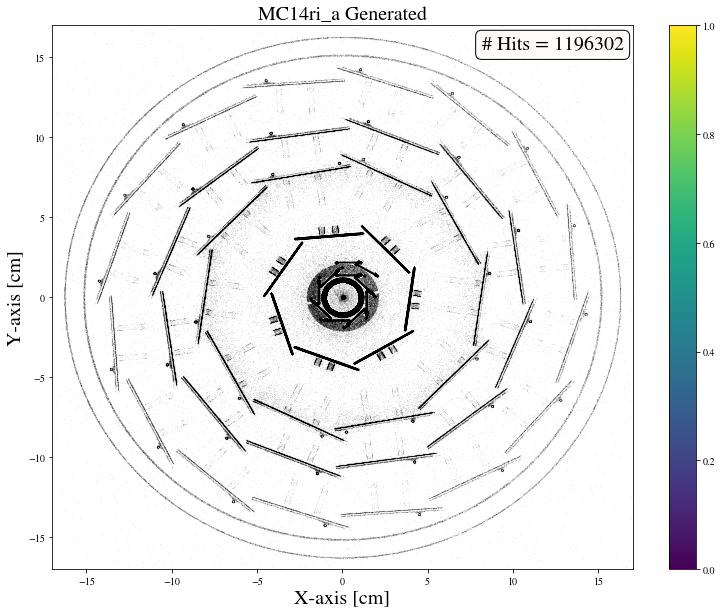

In [4]:
#qui disegno il primo scatterplot, 
#se vuoi usare come colore t come faccio io, deve essere una variabile con la stessa lunghezza di x e y, 
#guarda la cella sopra per vedere come si fa'

fig, ax = plt.subplots(figsize=(13, 10))
xyScatter = plt.scatter(-df_filteredmc.gamma_mcDecayVertexX, df_filteredmc.gamma_mcDecayVertexY, s=0.0005, c="black", cmap='plasma')
plt.xlim(-17,17)
plt.ylim(-17,17)
plt.title("MC14ri_a Generated", fontsize=20)
plt.xlabel('X-axis [cm]', fontsize=20)
plt.ylabel('Y-axis [cm]', fontsize=20)

#qui creo la box in cui inserisco descrizioni, in questo caso solo il numero di hits

textstr = (r'# Hits = %s' % (len(df_filteredmc.gamma_x), ))
props = dict(boxstyle='round', facecolor='snow', alpha=1)
ax.text(0.74, 0.98, textstr, transform=ax.transAxes, fontsize=20, verticalalignment='top', bbox=props)

plt.colorbar()

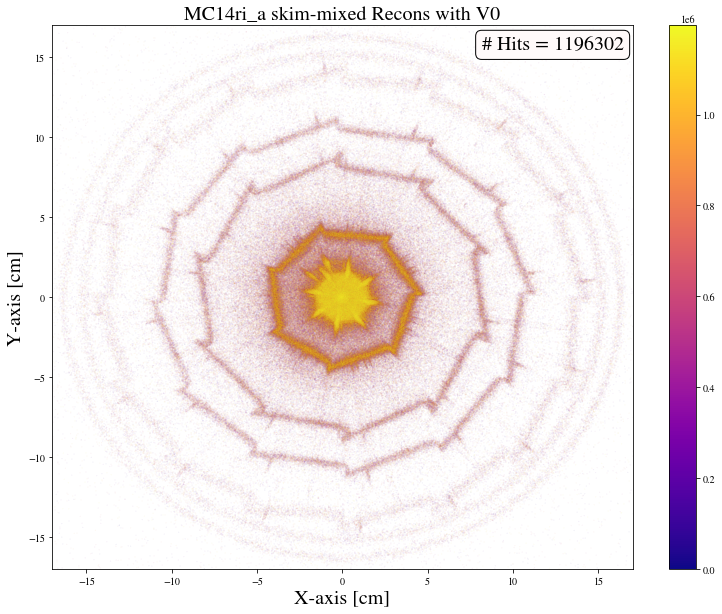

In [5]:
#qui disegno il primo scatterplot, 
#se vuoi usare come colore t come faccio io, deve essere una variabile con la stessa lunghezza di x e y, 
#guarda la cella sopra per vedere come si fa'

fig, ax = plt.subplots(figsize=(13, 10))
xyScatter = plt.scatter(df_filtered.gamma_x, df_filtered.gamma_y, s=0.0005, c=t, cmap='plasma')
plt.xlim(-17,17)
plt.ylim(-17,17)
plt.title("MC14ri_a skim-mixed Recons with V0", fontsize=20)
plt.xlabel('X-axis [cm]', fontsize=20)
plt.ylabel('Y-axis [cm]', fontsize=20)

#qui creo la box in cui inserisco descrizioni, in questo caso solo il numero di hits

textstr = (r'# Hits = %s' % (len(df_filtered.gamma_x), ))
props = dict(boxstyle='round', facecolor='snow', alpha=1)
ax.text(0.74, 0.98, textstr, transform=ax.transAxes, fontsize=20, verticalalignment='top', bbox=props)

plt.colorbar()

Text(0, 0.5, 'R [cm]')

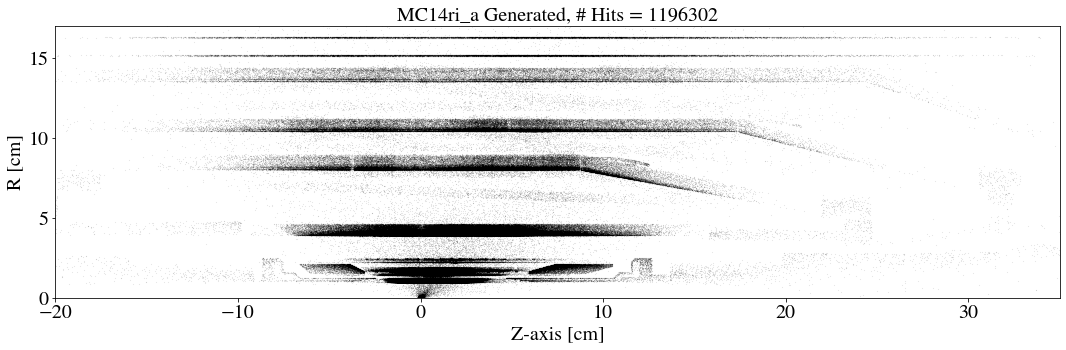

In [6]:
fig, ax = plt.subplots(figsize=(18, 5))
zyScatter = plt.scatter(df.gamma_mcDecayVertexZ, df.gamma_mcDecayVertexRho, s=0.001, c="black", cmap='plasma')
plt.xlim(-20,35)
plt.ylim(0,17)
ax.tick_params(axis='x',labelsize=20)
ax.tick_params(axis='y',labelsize=20)
plt.title(r"MC14ri_a Generated, # Hits = %s" % (len(df.gamma_x)), fontsize=20)
plt.xlabel('Z-axis [cm]', fontsize=20)
plt.ylabel('R [cm]', fontsize=20)
#textstr = (r'# Hits = %s' % (len(df.gamma_x), ))
#props = dict(boxstyle='round', facecolor='snow', alpha=1)
#ax.text(0.75, 0.1, textstr, transform=ax.transAxes, fontsize=20, verticalalignment='top', bbox=props)
#plt.colorbar()

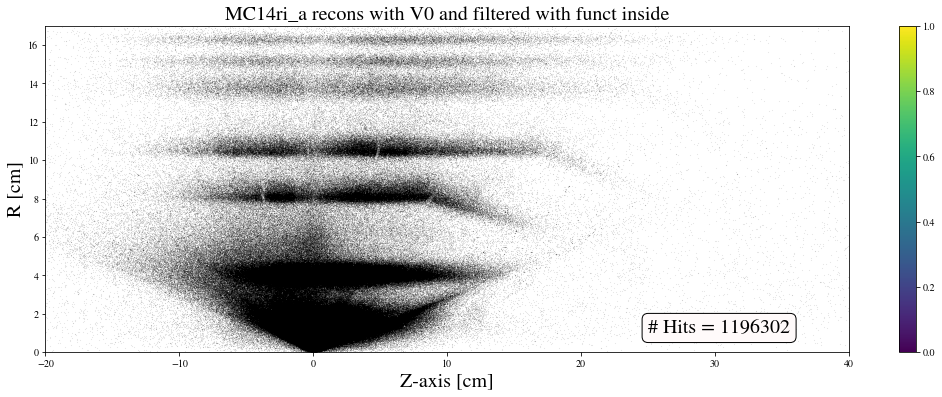

In [7]:
fig, ax = plt.subplots(figsize=(18, 6))
zyScatter = plt.scatter(df_filtered.gamma_z, df_filtered.gamma_dr, s=0.001, c="black", cmap='plasma')
plt.xlim(-20,40)
plt.ylim(-0,17)
plt.title("MC14ri_a recons with V0 and filtered with funct inside", fontsize=20)
plt.xlabel('Z-axis [cm]', fontsize=20)
plt.ylabel('R [cm]', fontsize=20)
textstr = (r'# Hits = %s' % (len(df_filtered.gamma_x), ))
props = dict(boxstyle='round', facecolor='snow', alpha=1)
ax.text(0.75, 0.1, textstr, transform=ax.transAxes, fontsize=20, verticalalignment='top', bbox=props)
plt.colorbar()

89402


Text(0.83, 0.2, '# Hits = 89402')

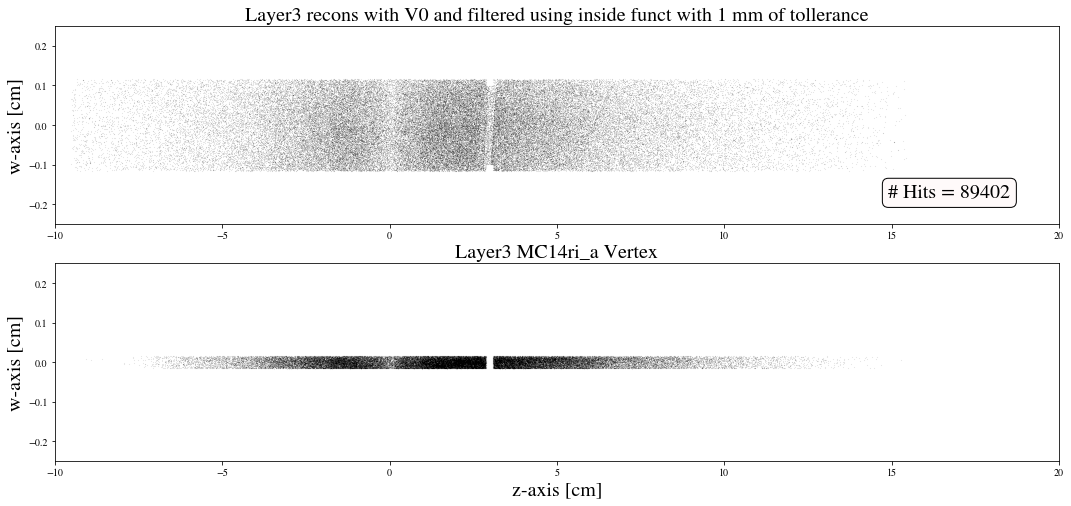

In [8]:
df_filtered3 = df.query("gamma_layer>=3 and gamma_layer<=3")
t = np.arange(len(df_filtered3.gamma_x))
print(len(df_filtered3.gamma_x))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 8))
ax1.scatter(df_filtered3.gamma_z, df_filtered3.gamma_w, s=0.001, c="black")
ax2.scatter(df_filtered3.gamma_mcDecayVertexZ, df_filtered3.gamma_mcDecayVertexW, s=0.001, c="black")
ax1.set_xlim(-10,20)
ax1.set_ylim(-0.25,0.25)
ax2.set_xlim(-10,20)
ax2.set_ylim(-0.25,0.25)
ax1.set_title("Layer3 recons with V0 and filtered using inside funct with 1 mm of tollerance", fontsize=20)
ax2.set_title("Layer3 MC14ri_a Vertex", fontsize=20)
plt.xlabel('z-axis [cm]', fontsize=20)
ax1.set_ylabel('w-axis [cm]', fontsize=20)
ax2.set_ylabel('w-axis [cm]', fontsize=20)
textstr = (r'# Hits = %s' % (len(df_filtered3.gamma_x), ))
props = dict(boxstyle='round', facecolor='snow', alpha=1)
ax1.text(0.83, 0.2, textstr, transform=ax1.transAxes, fontsize=20, verticalalignment='top', bbox=props)

Text(0.6, 0.97, 'mean = 0.011\n16 quantile = -0.019\n84 quantile = 0.020')

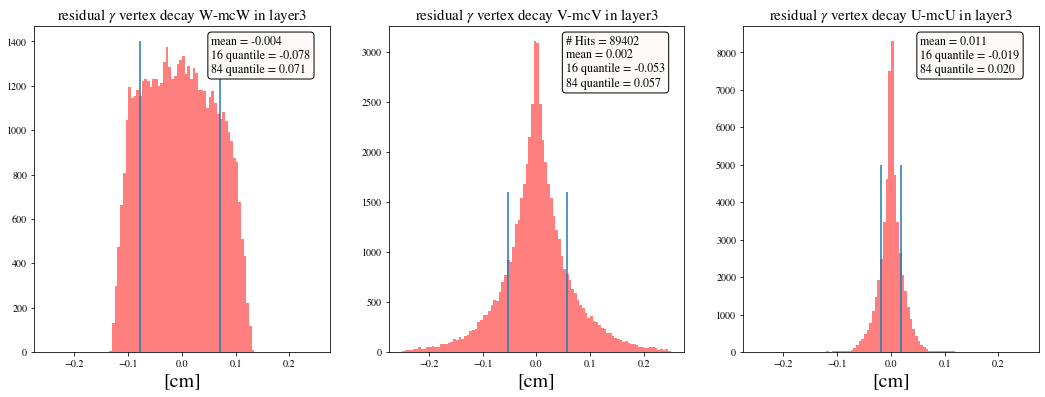

In [9]:
datosw = df_filtered3.gamma_w-df_filtered3.gamma_mcDecayVertexW

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,6))

ax1.hist(datosw, range=(-0.25, 0.25), bins=100, alpha=0.5, color="red", histtype='bar')

ax1.vlines(datosw.quantile(0.16), 0, 1400)
ax1.vlines(datosw.quantile(0.84), 0, 1400)

ax1.set_title("residual $\gamma$ vertex decay W-mcW in layer3", fontsize=15)
ax1.set_xlabel("[cm]",fontsize=20)
textstr = '\n'.join((
                    r'mean = %.3f' % (datosw.mean(), ),
                    r'16 quantile = %.3f' % (datosw.quantile(0.16), ),
                    r'84 quantile = %.3f' % (datosw.quantile(0.84), )))
props = dict(boxstyle='round', facecolor='snow', alpha=1)
ax1.text(0.6, 0.97, textstr, transform=ax1.transAxes, fontsize=12, verticalalignment='top', bbox=props)

datosv = df_filtered3.gamma_v-df_filtered3.gamma_mcDecayVertexV

ax2.hist(datosv, range=(-0.25, 0.25), bins=100, alpha=0.5, color="red", histtype='bar')

ax2.vlines(datosv.quantile(0.16), 0, 1600)
ax2.vlines(datosv.quantile(0.84), 0, 1600)

ax2.set_title("residual $\gamma$ vertex decay V-mcV in layer3", fontsize=15)
ax2.set_xlabel("[cm]",fontsize=20)
textstr = '\n'.join((
                    r'# Hits = %s' % (len(df_filtered3.gamma_z), ),
                    r'mean = %.3f' % (datosv.mean(), ),
                    r'16 quantile = %.3f' % (datosv.quantile(0.16), ),
                    r'84 quantile = %.3f' % (datosv.quantile(0.84), )))
props = dict(boxstyle='round', facecolor='snow', alpha=1)
ax2.text(0.6, 0.97, textstr, transform=ax2.transAxes, fontsize=12, verticalalignment='top', bbox=props)

datosu = df_filtered3.gamma_u-df_filtered3.gamma_mcDecayVertexU

ax3.hist(datosu, range=(-0.25, 0.25), bins=100, alpha=0.5, color="red", histtype='bar')

ax3.vlines(datosu.quantile(0.16), 0, 5000)
ax3.vlines(datosu.quantile(0.84), 0, 5000)

ax3.set_title("residual $\gamma$ vertex decay U-mcU in layer3", fontsize=15)
ax3.set_xlabel("[cm]",fontsize=20)
textstr = '\n'.join((
                    r'mean = %.3f' % (datosu.mean(), ),
                    r'16 quantile = %.3f' % (datosu.quantile(0.16), ),
                    r'84 quantile = %.3f' % (datosu.quantile(0.84), )))
props = dict(boxstyle='round', facecolor='snow', alpha=1)
ax3.text(0.6, 0.97, textstr, transform=ax3.transAxes, fontsize=12, verticalalignment='top', bbox=props)

33685


Text(0.83, 0.2, '# Hits = 33685')

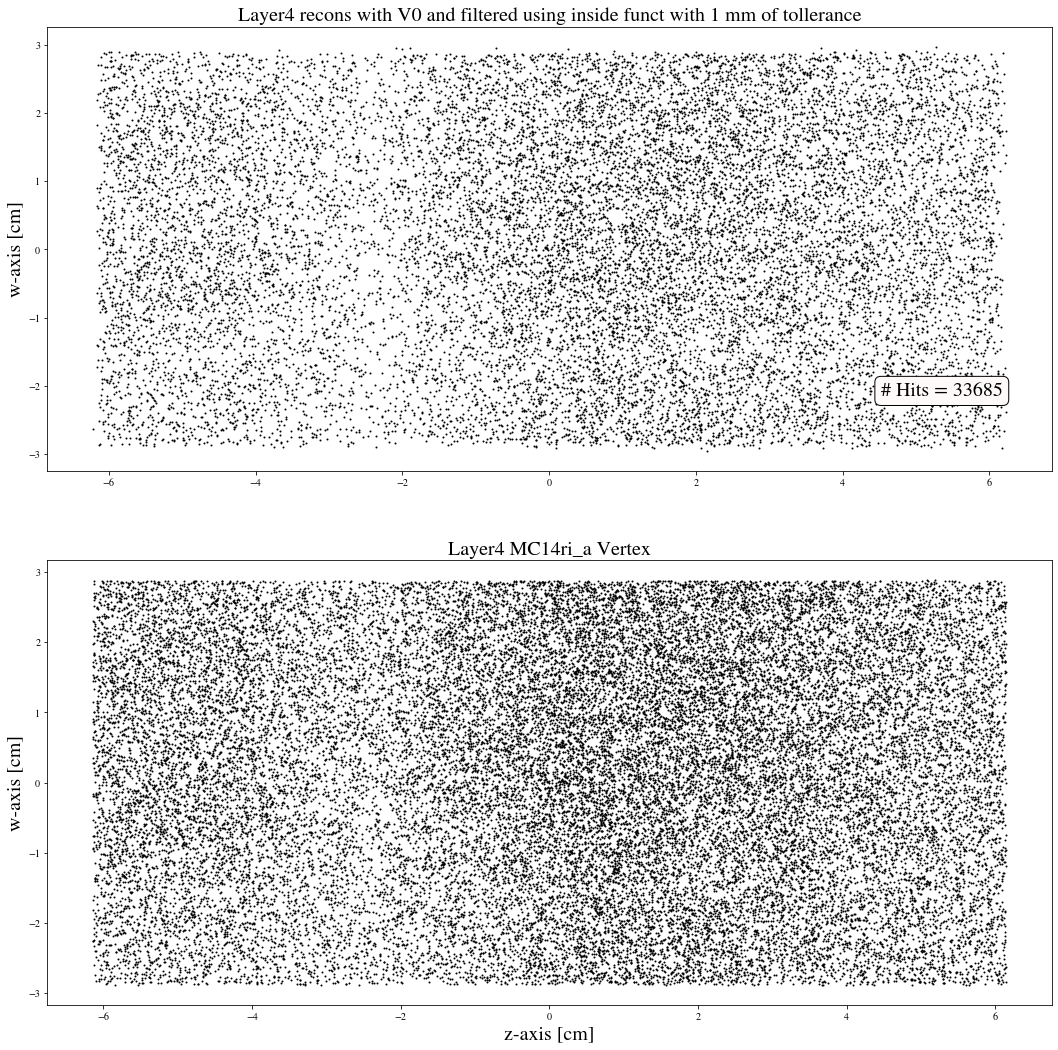

In [10]:
df_filtered4 = df.query("gamma_mcDecayVertexLayer==4 and gamma_mcDecayVertexSensor==2")
t = np.arange(len(df_filtered4.gamma_x))
print(len(df_filtered4.gamma_x))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 18))
ax1.scatter(df_filtered4.gamma_v, df_filtered4.gamma_u, s=1, c="black")
ax2.scatter(df_filtered4.gamma_mcDecayVertexV, df_filtered4.gamma_mcDecayVertexU, s=1, c="black")
#ax1.set_xlim(-15,22)
#ax1.set_ylim(-0.25,0.25)
#ax2.set_xlim(-15,22)
#ax2.set_ylim(-0.25,0.25)
ax1.set_title("Layer4 recons with V0 and filtered using inside funct with 1 mm of tollerance", fontsize=20)
ax2.set_title("Layer4 MC14ri_a Vertex", fontsize=20)
plt.xlabel('z-axis [cm]', fontsize=20)
ax1.set_ylabel('w-axis [cm]', fontsize=20)
ax2.set_ylabel('w-axis [cm]', fontsize=20)
textstr = (r'# Hits = %s' % (len(df_filtered4.gamma_x), ))
props = dict(boxstyle='round', facecolor='snow', alpha=1)
ax1.text(0.83, 0.2, textstr, transform=ax1.transAxes, fontsize=20, verticalalignment='top', bbox=props)

Text(0.6, 0.97, 'mean = -0.016\n16 quantile = -0.013\n84 quantile = 0.013')

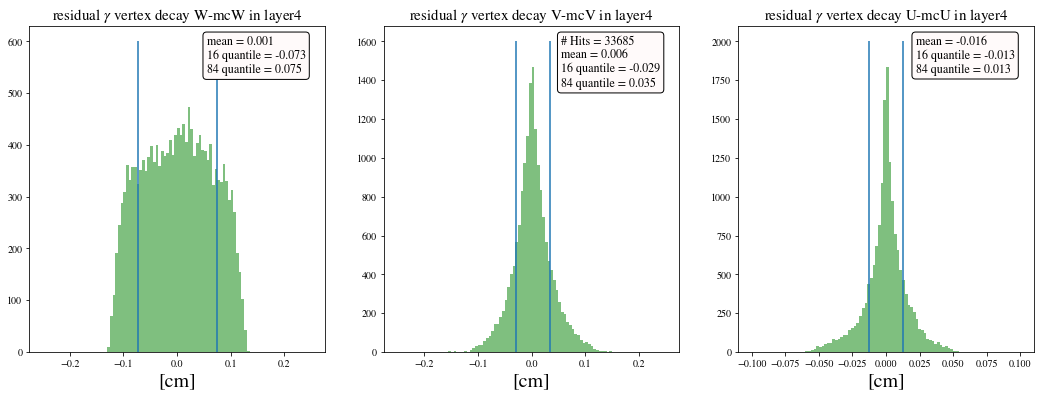

In [11]:
datosw = df_filtered4.gamma_w-df_filtered4.gamma_mcDecayVertexW

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,6))

ax1.hist(datosw, range=(-0.25, 0.25), bins=100, alpha=0.5, color="green", histtype='bar')

ax1.vlines(datosw.quantile(0.16), 0, 600)
ax1.vlines(datosw.quantile(0.84), 0, 600)

ax1.set_title("residual $\gamma$ vertex decay W-mcW in layer4", fontsize=15)
ax1.set_xlabel("[cm]",fontsize=20)
textstr = '\n'.join((
                    r'mean = %.3f' % (datosw.mean(), ),
                    r'16 quantile = %.3f' % (datosw.quantile(0.16), ),
                    r'84 quantile = %.3f' % (datosw.quantile(0.84), )))
props = dict(boxstyle='round', facecolor='snow', alpha=1)
ax1.text(0.6, 0.97, textstr, transform=ax1.transAxes, fontsize=12, verticalalignment='top', bbox=props)

datosv = df_filtered4.gamma_v-df_filtered4.gamma_mcDecayVertexV

ax2.hist(datosv, range=(-0.25, 0.25), bins=100, alpha=0.5, color="green", histtype='bar')

ax2.vlines(datosv.quantile(0.16), 0, 1600)
ax2.vlines(datosv.quantile(0.84), 0, 1600)

ax2.set_title("residual $\gamma$ vertex decay V-mcV in layer4", fontsize=15)
ax2.set_xlabel("[cm]",fontsize=20)
textstr = '\n'.join((
                    r'# Hits = %s' % (len(df_filtered4.gamma_z), ),
                    r'mean = %.3f' % (datosv.mean(), ),
                    r'16 quantile = %.3f' % (datosv.quantile(0.16), ),
                    r'84 quantile = %.3f' % (datosv.quantile(0.84), )))
props = dict(boxstyle='round', facecolor='snow', alpha=1)
ax2.text(0.6, 0.97, textstr, transform=ax2.transAxes, fontsize=12, verticalalignment='top', bbox=props)

datosu = df_filtered4.gamma_u-df_filtered4.gamma_mcDecayVertexU

ax3.hist(datosu, range=(-0.1, 0.1), bins=100, alpha=0.5, color="green", histtype='bar')

ax3.vlines(datosu.quantile(0.16), 0, 2000)
ax3.vlines(datosu.quantile(0.84), 0, 2000)

ax3.set_title("residual $\gamma$ vertex decay U-mcU in layer4", fontsize=15)
ax3.set_xlabel("[cm]",fontsize=20)
textstr = '\n'.join((
                    r'mean = %.3f' % (datosu.mean(), ),
                    r'16 quantile = %.3f' % (datosu.quantile(0.16), ),
                    r'84 quantile = %.3f' % (datosu.quantile(0.84), )))
props = dict(boxstyle='round', facecolor='snow', alpha=1)
ax3.text(0.6, 0.97, textstr, transform=ax3.transAxes, fontsize=12, verticalalignment='top', bbox=props)

25162


Text(0.83, 0.2, '# Hits = 25162')

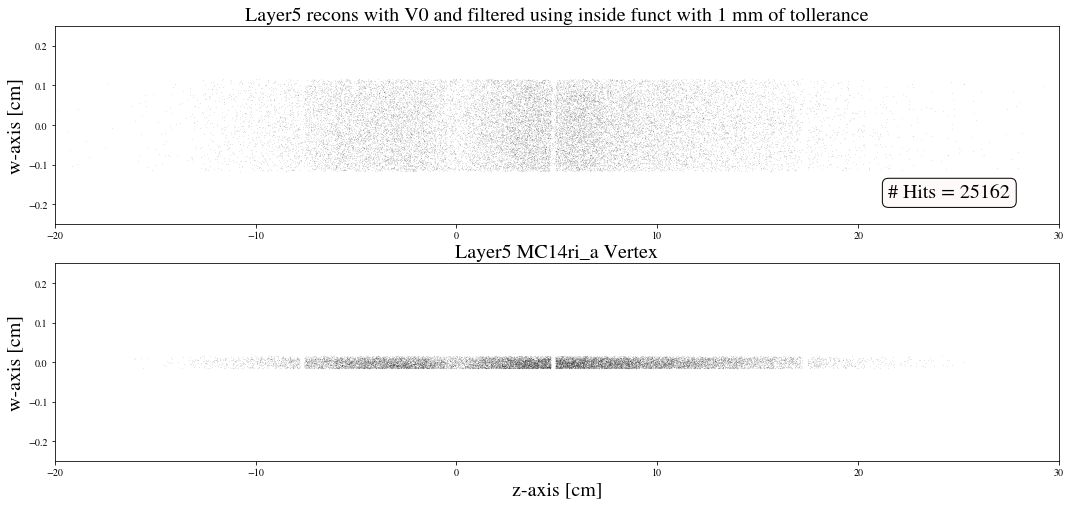

In [12]:
df_filtered5 = df.query("gamma_layer>=5 and gamma_layer<=5")
t = np.arange(len(df_filtered5.gamma_x))
print(len(df_filtered5.gamma_x))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 8))
ax1.scatter(df_filtered5.gamma_z, df_filtered5.gamma_w, s=0.001, c="black")
ax2.scatter(df_filtered5.gamma_mcDecayVertexZ, df_filtered5.gamma_mcDecayVertexW, s=0.001, c="black")
ax1.set_xlim(-20,30)
ax1.set_ylim(-0.25,0.25)
ax2.set_xlim(-20,30)
ax2.set_ylim(-0.25,0.25)
ax1.set_title("Layer5 recons with V0 and filtered using inside funct with 1 mm of tollerance", fontsize=20)
ax2.set_title("Layer5 MC14ri_a Vertex", fontsize=20)
plt.xlabel('z-axis [cm]', fontsize=20)
ax1.set_ylabel('w-axis [cm]', fontsize=20)
ax2.set_ylabel('w-axis [cm]', fontsize=20)
textstr = (r'# Hits = %s' % (len(df_filtered5.gamma_x), ))
props = dict(boxstyle='round', facecolor='snow', alpha=1)
ax1.text(0.83, 0.2, textstr, transform=ax1.transAxes, fontsize=20, verticalalignment='top', bbox=props)

Text(0.6, 0.97, 'mean = -0.008\n16 quantile = -0.011\n84 quantile = 0.010')

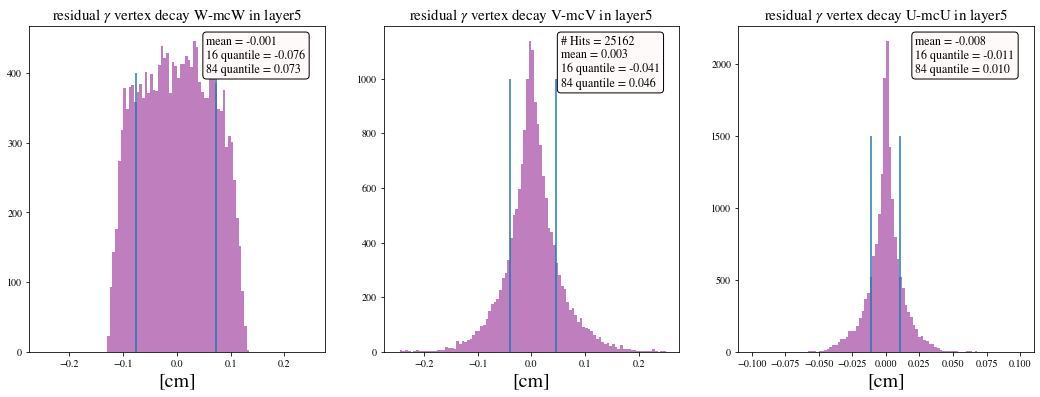

In [13]:
datosw = df_filtered5.gamma_w-df_filtered5.gamma_mcDecayVertexW

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,6))

ax1.hist(datosw, range=(-0.25, 0.25), bins=100, alpha=0.5, color="purple", histtype='bar')

ax1.vlines(datosw.quantile(0.16), 0, 400)
ax1.vlines(datosw.quantile(0.84), 0, 400)

ax1.set_title("residual $\gamma$ vertex decay W-mcW in layer5", fontsize=15)
ax1.set_xlabel("[cm]",fontsize=20)
textstr = '\n'.join((
                    r'mean = %.3f' % (datosw.mean(), ),
                    r'16 quantile = %.3f' % (datosw.quantile(0.16), ),
                    r'84 quantile = %.3f' % (datosw.quantile(0.84), )))
props = dict(boxstyle='round', facecolor='snow', alpha=1)
ax1.text(0.6, 0.97, textstr, transform=ax1.transAxes, fontsize=12, verticalalignment='top', bbox=props)

datosv = df_filtered5.gamma_v-df_filtered5.gamma_mcDecayVertexV

ax2.hist(datosv, range=(-0.25, 0.25), bins=100, alpha=0.5, color="purple", histtype='bar')

ax2.vlines(datosv.quantile(0.16), 0, 1000)
ax2.vlines(datosv.quantile(0.84), 0, 1000)

ax2.set_title("residual $\gamma$ vertex decay V-mcV in layer5", fontsize=15)
ax2.set_xlabel("[cm]",fontsize=20)
textstr = '\n'.join((
                    r'# Hits = %s' % (len(df_filtered5.gamma_z), ),
                    r'mean = %.3f' % (datosv.mean(), ),
                    r'16 quantile = %.3f' % (datosv.quantile(0.16), ),
                    r'84 quantile = %.3f' % (datosv.quantile(0.84), )))
props = dict(boxstyle='round', facecolor='snow', alpha=1)
ax2.text(0.6, 0.97, textstr, transform=ax2.transAxes, fontsize=12, verticalalignment='top', bbox=props)

datosu = df_filtered5.gamma_u-df_filtered5.gamma_mcDecayVertexU

ax3.hist(datosu, range=(-0.1, 0.1), bins=100, alpha=0.5, color="purple", histtype='bar')

ax3.vlines(datosu.quantile(0.16), 0, 1500)
ax3.vlines(datosu.quantile(0.84), 0, 1500)

ax3.set_title("residual $\gamma$ vertex decay U-mcU in layer5", fontsize=15)
ax3.set_xlabel("[cm]",fontsize=20)
textstr = '\n'.join((
                    r'mean = %.3f' % (datosu.mean(), ),
                    r'16 quantile = %.3f' % (datosu.quantile(0.16), ),
                    r'84 quantile = %.3f' % (datosu.quantile(0.84), )))
props = dict(boxstyle='round', facecolor='snow', alpha=1)
ax3.text(0.6, 0.97, textstr, transform=ax3.transAxes, fontsize=12, verticalalignment='top', bbox=props)

In [14]:
df_filtered6 = df.query("gamma_mcDecayVertexLayer==6 and (gamma_mcDecayVertexSensor==2 or gamma_mcDecayVertexSensor==3 or gamma_mcDecayVertexSensor==4)")
t = np.arange(len(df_filtered6.gamma_x))
print(len(df_filtered6.gamma_x))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 18))
ax1.scatter(df_filtered6.gamma_v, df_filtered6.gamma_u, s=1, c="black")
ax2.scatter(df_filtered6.gamma_mcDecayVertexV, df_filtered6.gamma_mcDecayVertexU, s=1, c="black")
#ax1.set_xlim(-25,40)
#ax1.set_ylim(-0.25,0.25)
#ax2.set_xlim(-25,40)
#ax2.set_ylim(-0.25,0.25)
ax1.set_title("Layer6 recons with V0 and filtered using inside funct with 1 mm of tollerance", fontsize=20)
ax2.set_title("Layer6 MC14ri_a Vertex", fontsize=20)
plt.xlabel('z-axis [cm]', fontsize=20)
ax1.set_ylabel('w-axis [cm]', fontsize=20)
ax2.set_ylabel('w-axis [cm]', fontsize=20)
textstr = (r'# Hits = %s' % (len(df_filtered6.gamma_x), ))
props = dict(boxstyle='round', facecolor='snow', alpha=1)
ax1.text(0.83, 0.2, textstr, transform=ax1.transAxes, fontsize=20, verticalalignment='top', bbox=props)

13967


Text(0.83, 0.2, '# Hits = 13967')

In [15]:
datosw = df_filtered6.gamma_w-df_filtered6.gamma_mcDecayVertexW

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,6))

ax1.hist(datosw, range=(-0.25, 0.25), bins=100, alpha=0.5, color="blue", histtype='bar')

ax1.vlines(datosw.quantile(0.16), 0, 120)
ax1.vlines(datosw.quantile(0.84), 0, 120)

ax1.set_title("residual $\gamma$ vertex decay W-mcW in layer6", fontsize=15)
ax1.set_xlabel("[cm]",fontsize=20)
textstr = '\n'.join((
                    r'mean = %.3f' % (datosw.mean(), ),
                    r'16 quantile = %.3f' % (datosw.quantile(0.16), ),
                    r'84 quantile = %.3f' % (datosw.quantile(0.84), )))
props = dict(boxstyle='round', facecolor='snow', alpha=1)
ax1.text(0.6, 0.97, textstr, transform=ax1.transAxes, fontsize=12, verticalalignment='top', bbox=props)

datosv = df_filtered6.gamma_v-df_filtered6.gamma_mcDecayVertexV

ax2.hist(datosv, range=(-0.55, 0.55), bins=100, alpha=0.5, color="blue", histtype='bar')

ax2.vlines(datosv.quantile(0.16), 0, 150)
ax2.vlines(datosv.quantile(0.84), 0, 150)

ax2.set_title("residual $\gamma$ vertex decay V-mcV in layer6", fontsize=15)
ax2.set_xlabel("[cm]",fontsize=20)
textstr = '\n'.join((
                    r'# Hits = %s' % (len(df_filtered6.gamma_z), ),
                    r'mean = %.3f' % (datosv.mean(), ),
                    r'16 quantile = %.3f' % (datosv.quantile(0.16), ),
                    r'84 quantile = %.3f' % (datosv.quantile(0.84), )))
props = dict(boxstyle='round', facecolor='snow', alpha=1)
ax2.text(0.6, 0.97, textstr, transform=ax2.transAxes, fontsize=12, verticalalignment='top', bbox=props)

datosu = df_filtered6.gamma_u-df_filtered6.gamma_mcDecayVertexU

ax3.hist(datosu, range=(-0.25, 0.25), bins=100, alpha=0.5, color="blue", histtype='bar')

ax3.vlines(datosu.quantile(0.16), 0, 500)
ax3.vlines(datosu.quantile(0.84), 0, 500)

ax3.set_title("residual $\gamma$ vertex decay U-mcU in layer6", fontsize=15)
ax3.set_xlabel("[cm]",fontsize=20)
textstr = '\n'.join((
                    r'mean = %.3f' % (datosu.mean(), ),
                    r'16 quantile = %.3f' % (datosu.quantile(0.16), ),
                    r'84 quantile = %.3f' % (datosu.quantile(0.84), )))
props = dict(boxstyle='round', facecolor='snow', alpha=1)
ax3.text(0.6, 0.97, textstr, transform=ax3.transAxes, fontsize=12, verticalalignment='top', bbox=props)

Text(0.6, 0.97, 'mean = -0.011\n16 quantile = -0.021\n84 quantile = 0.020')

In [16]:
datos = df_filtereduv.gamma_v-df_filtereduv.gamma_mcDecayVertexV

fig, ax = plt.subplots(figsize=(12,6))

plt.hist(datos, range=(-0.25, 0.25), bins=100, alpha=0.5, color="red", histtype='bar')

plt.vlines(datos.quantile(0.16), 0, 1600)
plt.vlines(datos.quantile(0.84), 0, 1600)

plt.title("residual $\gamma$ vertex decay V-mcV in layer3", fontsize=20)
plt.xlabel("[cm]",fontsize=20)
textstr = '\n'.join((
                    r'# Hits = %s' % (len(df_filtereduv.gamma_z), ),
                    r'mean = %.3f' % (datos.mean(), ),
                    r'16 quantile = %.3f' % (datos.quantile(0.16), ),
                    r'84 quantile = %.3f' % (datos.quantile(0.84), )))
props = dict(boxstyle='round', facecolor='snow', alpha=1)
ax.text(0.67, 0.95, textstr, transform=ax.transAxes, fontsize=20, verticalalignment='top', bbox=props)
plt.show()

NameError: name 'df_filtereduv' is not defined

In [ ]:
datos = df_filtereduv.gamma_u-df_filtereduv.gamma_mcDecayVertexU

fig, ax = plt.subplots(figsize=(12,6))

plt.hist(datos, range=(-0.1, 0.1), bins=100, alpha=0.5, color="red", histtype='bar')

plt.vlines(datos.quantile(0.16), 0, 4000)
plt.vlines(datos.quantile(0.84), 0, 4000)

plt.title("residual $\gamma$ vertex decay U-mcU in layer3", fontsize=20)
plt.xlabel("[cm]",fontsize=20)
textstr = '\n'.join((
                    r'# Hits = %s' % (len(df_filtereduv.gamma_z), ),
                    r'mean = %.3f' % (datos.mean(), ),
                    r'16 quantile = %.3f' % (datos.quantile(0.16), ),
                    r'84 quantile = %.3f' % (datos.quantile(0.84), )))
props = dict(boxstyle='round', facecolor='snow', alpha=1)
ax.text(0.67, 0.95, textstr, transform=ax.transAxes, fontsize=20, verticalalignment='top', bbox=props)
plt.show()